In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as mtick

import mplcyberpunk

plt.style.use('cyberpunk')

In [3]:
ticker = 'WEGE3.SA'

dataFinal = datetime.now()
dataInicial = datetime.now() - timedelta(1825)

dadosWege = yf.download(ticker, dataInicial, dataFinal)['Close']
dadosWege = dadosWege.to_frame()


MM30Wege = dadosWege.rolling(30).mean()
MM200Wege = dadosWege.rolling(200).mean()


dadosWege['MM30'] = MM30Wege.values
dadosWege['MM200'] = MM200Wege.values

dadosWege = dadosWege.dropna()

dadosWege['Ordem'] = np.where(dadosWege['MM30'] > dadosWege['MM200'], 'Compra', 'Venda')

dadosWege

[*********************100%***********************]  1 of 1 completed


,Close,MM30,MM200,Ordem
Date,,,,
2019-04-03,9.235000,9.295833,9.091875,Compra
2019-04-04,9.405000,9.286167,9.098725,Compra
2019-04-05,9.535000,9.290833,9.106675,Compra
2019-04-08,9.375000,9.288667,9.114525,Compra
2019-04-09,9.255000,9.279667,9.122675,Compra
...,...,...,...,...
2023-06-02,37.669998,39.515667,37.056050,Compra
2023-06-05,37.630001,39.428333,37.092500,Compra
2023-06-06,38.200001,39.356667,37.130550,Compra


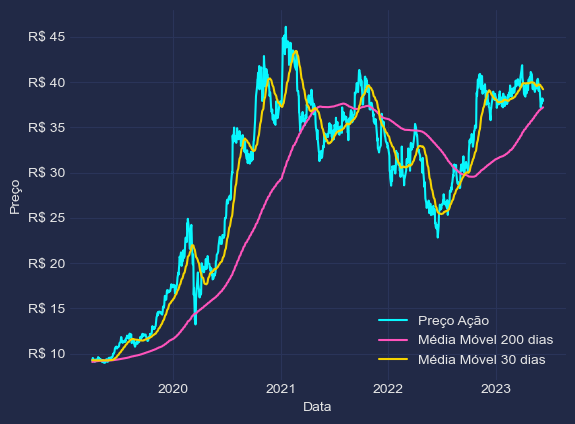

In [4]:
fig, ax = plt.subplots()
ax.plot(dadosWege['Close'], label = 'Preço Ação')
ax.plot(dadosWege['MM200'], label = 'Média Móvel 200 dias')
ax.plot(dadosWege['MM30'], label = 'Média Móvel 30 dias')
ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('R$ %1.0f'))
ax.set_ylabel('Preço')
ax.set_xlabel('Data')
ax.legend(loc=0)